<a href="https://colab.research.google.com/github/Stiven2308/Challenge3-data-science-alura-latam/blob/main/TelecomX_AluraLATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de datos:**

In [5]:
import pandas as pd
#cargar el archivo de datos
data= pd.read_csv('https://raw.githubusercontent.com/Stiven2308/Challenge3-data-science-alura-latam/refs/heads/main/DB_tratados.csv',sep=',')
data.shape

(7043, 24)

In [7]:
#primeras filas del archivo de datos
data.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,0-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,0-10,2
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-10,1
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-20,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-10,2


In [6]:
# Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID Cliente                         7043 non-null   object 
 1   Abandono                           7043 non-null   int64  
 2   Género                             7043 non-null   object 
 3   Mayor de 65 años                   7043 non-null   bool   
 4   Tiene Pareja                       7043 non-null   int64  
 5   Tiene Dependientes                 7043 non-null   int64  
 6   Duración del Contrato (meses)      7043 non-null   int64  
 7   Servicio Telefónico                7043 non-null   int64  
 8   Múltiples Líneas                   7043 non-null   int64  
 9   Servicio de Internet               7043 non-null   object 
 10  Seguridad en Línea                 7043 non-null   int64  
 11  Respaldo en Línea                  7043 non-null   int64

# **Proporción actual de abandono de clientes:**



In [14]:
print("\nProporción de abandono de clientes:")
print(data['Abandono'].value_counts(normalize=True))


Proporción de abandono de clientes:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


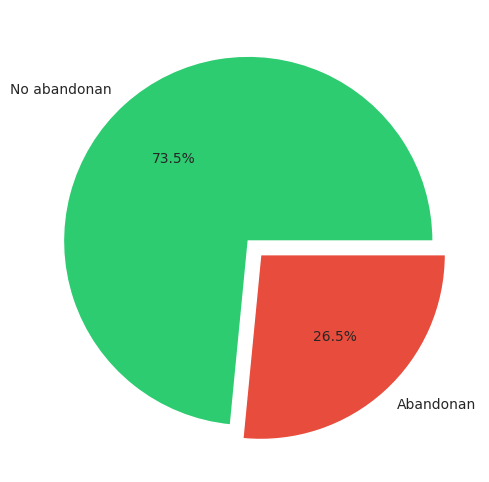

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de distribución de clases
clases = ['No abandonan', 'Abandonan']
porcentajes = [73.463, 26.537]
# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Gráfico de pastel (Pie Chart)
plt.pie(porcentajes,
        labels=clases,
        autopct='%1.1f%%',
        colors=['#2ecc71', '#e74c3c'],
        explode=(0, 0.1))  # Separar ligeramente la clase de abandono

plt.show()

# **Variables categóricas:**

In [17]:
#variables categóricas
data.describe(include='object')

,ID Cliente,Género,Servicio de Internet,Tipo de Contrato,Método de Pago,Rango de Contrato
count,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,4,8
top,9995-HOTOH,M,Fibra Óptica,Mensual,Cheque electrónico,0-10
freq,1,3555,3096,3875,2365,1854


In [18]:
# Eliminación de columnas que no correlacionado al evento.
data = data.drop(columns=['ID Cliente','Costo Diario','Duración del Contrato (meses)'])

In [19]:
#información general del conjunto de datos después de eliminar columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Abandono                           7043 non-null   int64  
 1   Género                             7043 non-null   object 
 2   Mayor de 65 años                   7043 non-null   bool   
 3   Tiene Pareja                       7043 non-null   int64  
 4   Tiene Dependientes                 7043 non-null   int64  
 5   Servicio Telefónico                7043 non-null   int64  
 6   Múltiples Líneas                   7043 non-null   int64  
 7   Servicio de Internet               7043 non-null   object 
 8   Seguridad en Línea                 7043 non-null   int64  
 9   Respaldo en Línea                  7043 non-null   int64  
 10  Protección del Dispositivo         7043 non-null   int64  
 11  Soporte Técnico                    7043 non-null   int64

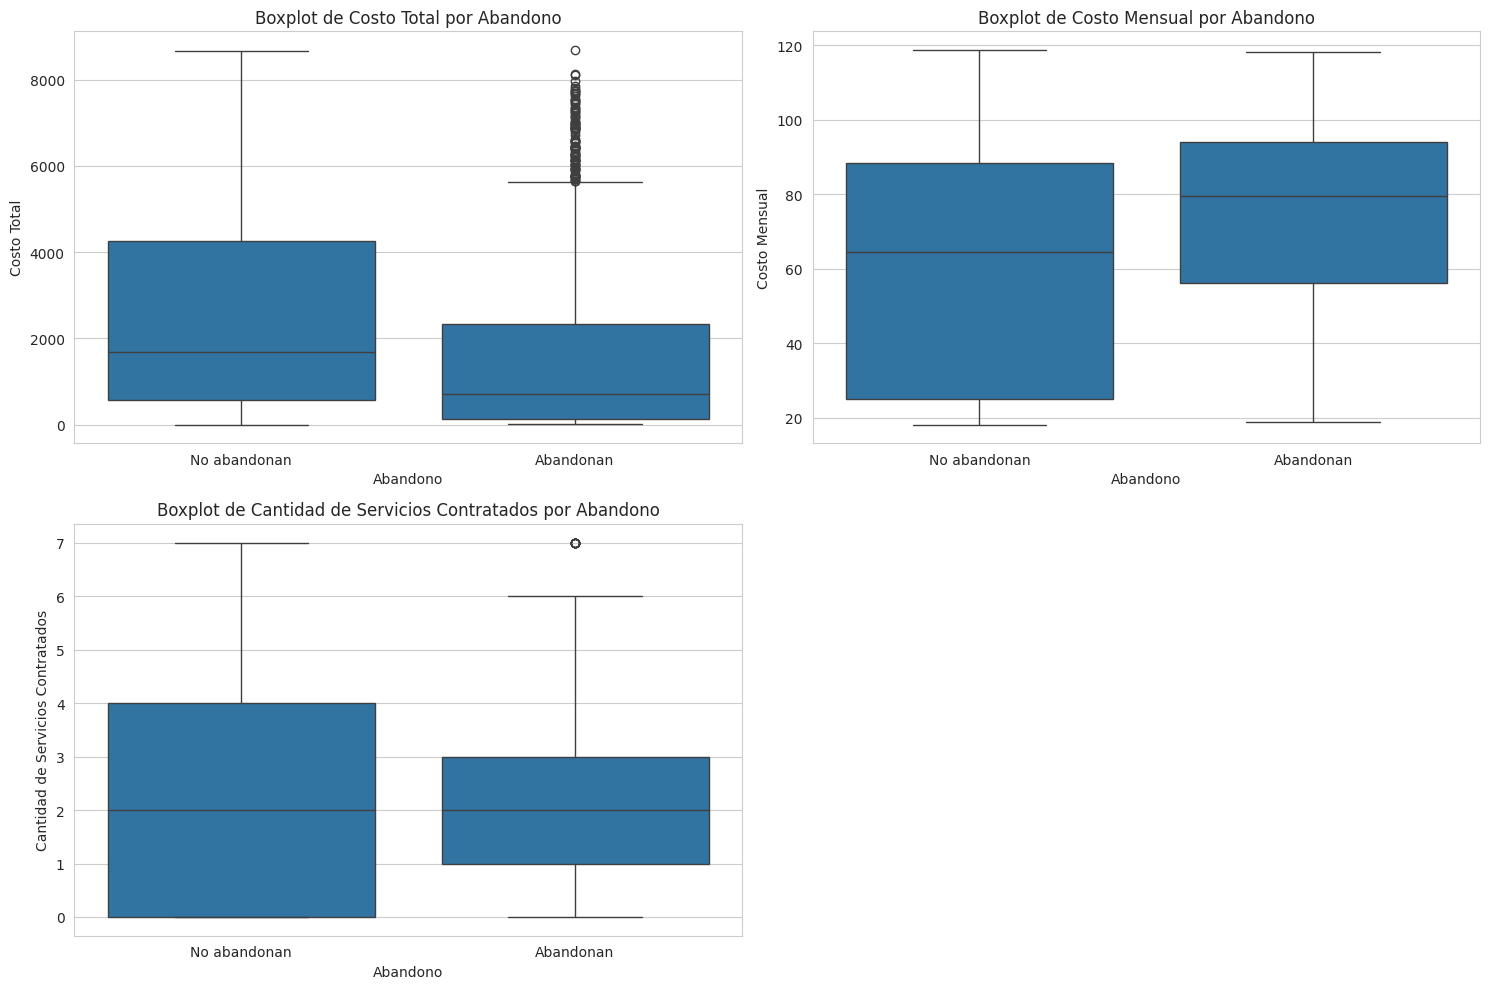

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

columnas_numericas = [
    'Costo Total',
    'Costo Mensual',
    'Cantidad de Servicios Contratados'
]

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Abandono', y=columna, data=data)
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No abandonan', 'Abandonan'])
    plt.tight_layout()
plt.show()

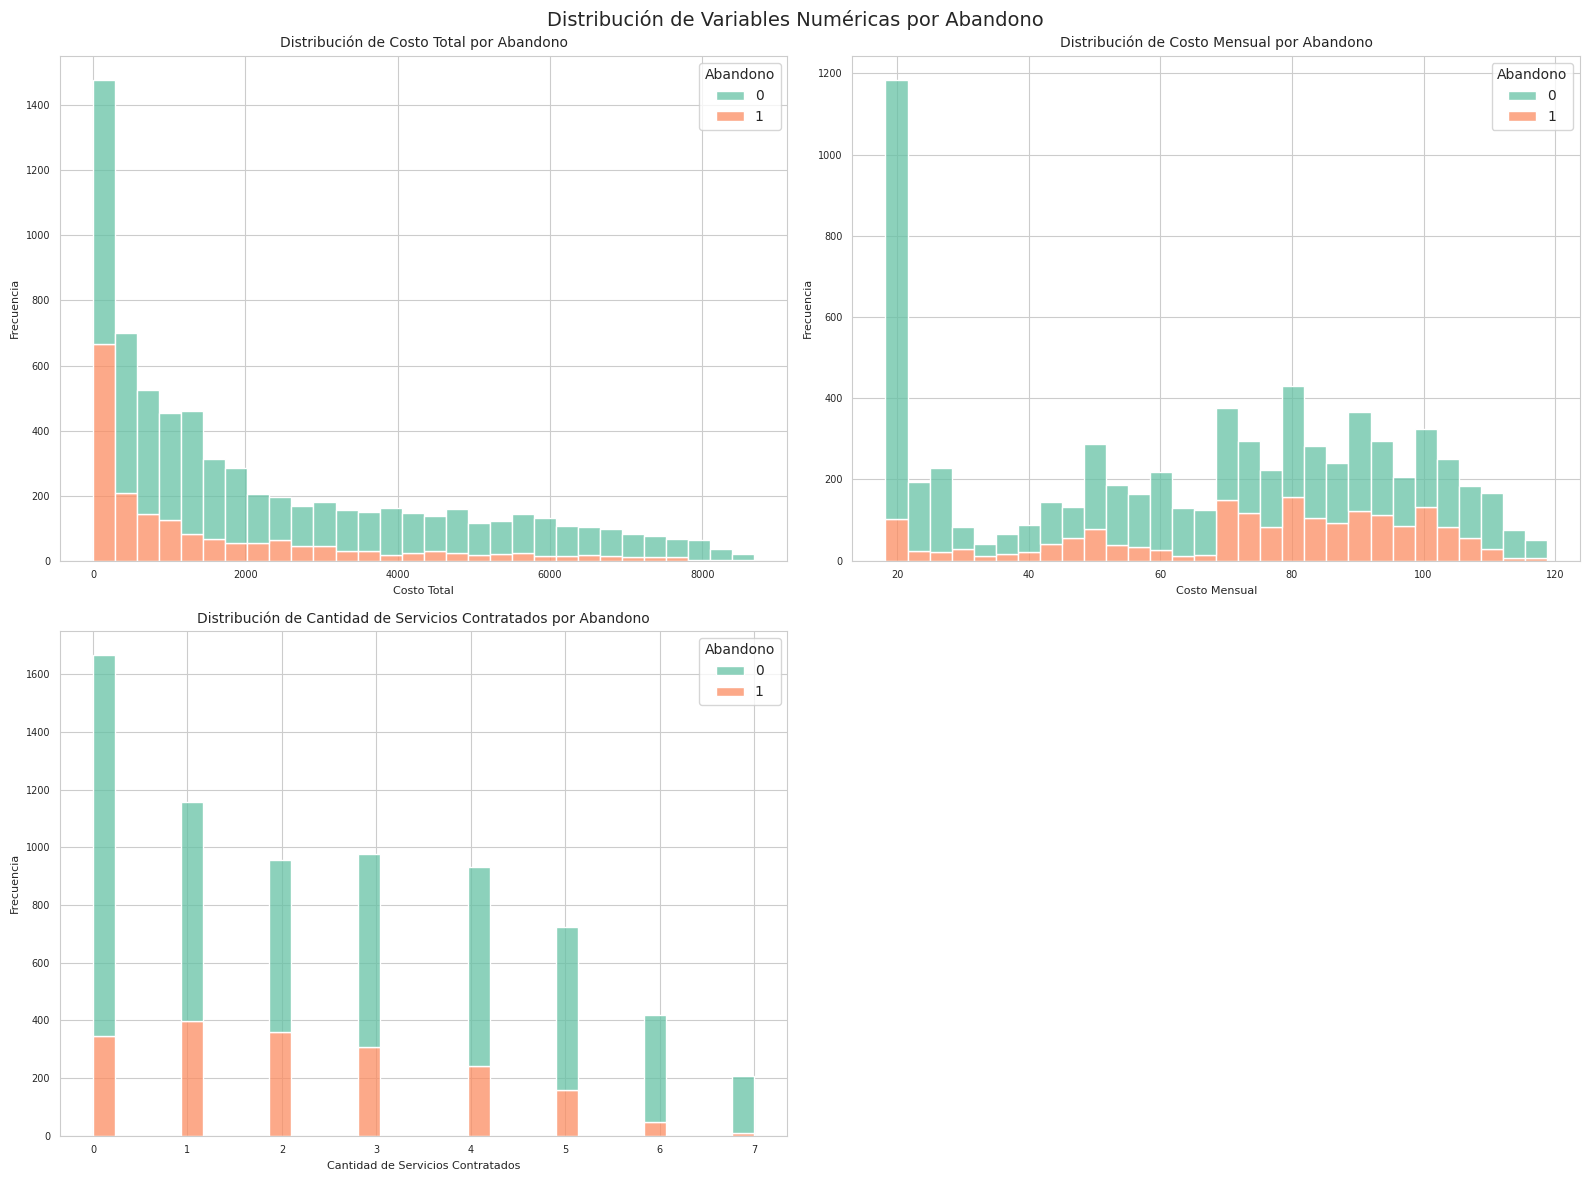


Estadísticas para Costo Total:
           count         mean          std    min    25%       50%      75%  \
Abandono                                                                      
0         5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1         1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

              max  
Abandono           
0         8672.45  
1         8684.80  

Estadísticas para Costo Mensual:
           count       mean        std    min    25%     50%   75%     max
Abandono                                                                  
0         5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1         1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

Estadísticas para Cantidad de Servicios Contratados:
           count      mean       std  min  25%  50%  75%  max
Abandono                                                     
0         5174.0  2.545226  2.149223  0.0  0.0  2.0  4.0  7

In [49]:
# distribución de las variables numéricas por Abandono(Crunch)
plt.figure(figsize=(16,12))
palette_colorblind = sns.color_palette("Set2")[:2]
# Histogramas por estado de Abandono
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)

    sns.histplot(
        data=data,
        x=columna,
        hue='Abandono',
        multiple="stack",
        palette=palette_colorblind,
        bins=30  # Número de bins
    )

    plt.title(f'Distribución de {columna} por Abandono', fontsize=10)
    plt.xlabel(columna, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.suptitle('Distribución de Variables Numéricas por Abandono', fontsize=14)
plt.tight_layout()
plt.show()

# Análisis estadístico complementario
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(data.groupby('Abandono')[columna].describe())

In [29]:
# Comportamiento de las variables binarias relevantes
variables_binarias = ['Tiene Pareja','Tiene Dependientes',
                      'Múltiples Líneas', 'Seguridad en Línea',
                      'Respaldo en Línea', 'Protección del Dispositivo']
for columna in variables_binarias:
    print(columna, data[columna].value_counts(normalize=True)*100)

Tiene Pareja Tiene Pareja
0    51.69672
1    48.30328
Name: proportion, dtype: float64
Tiene Dependientes Tiene Dependientes
0    70.041176
1    29.958824
Name: proportion, dtype: float64
Múltiples Líneas Múltiples Líneas
 0    48.132898
 1    42.183729
-1     9.683374
Name: proportion, dtype: float64
Seguridad en Línea Seguridad en Línea
 0    49.666335
 1    28.666761
-1    21.666903
Name: proportion, dtype: float64
Respaldo en Línea Respaldo en Línea
 0    43.844952
 1    34.488144
-1    21.666903
Name: proportion, dtype: float64
Protección del Dispositivo Protección del Dispositivo
 0    43.944342
 1    34.388755
-1    21.666903
Name: proportion, dtype: float64


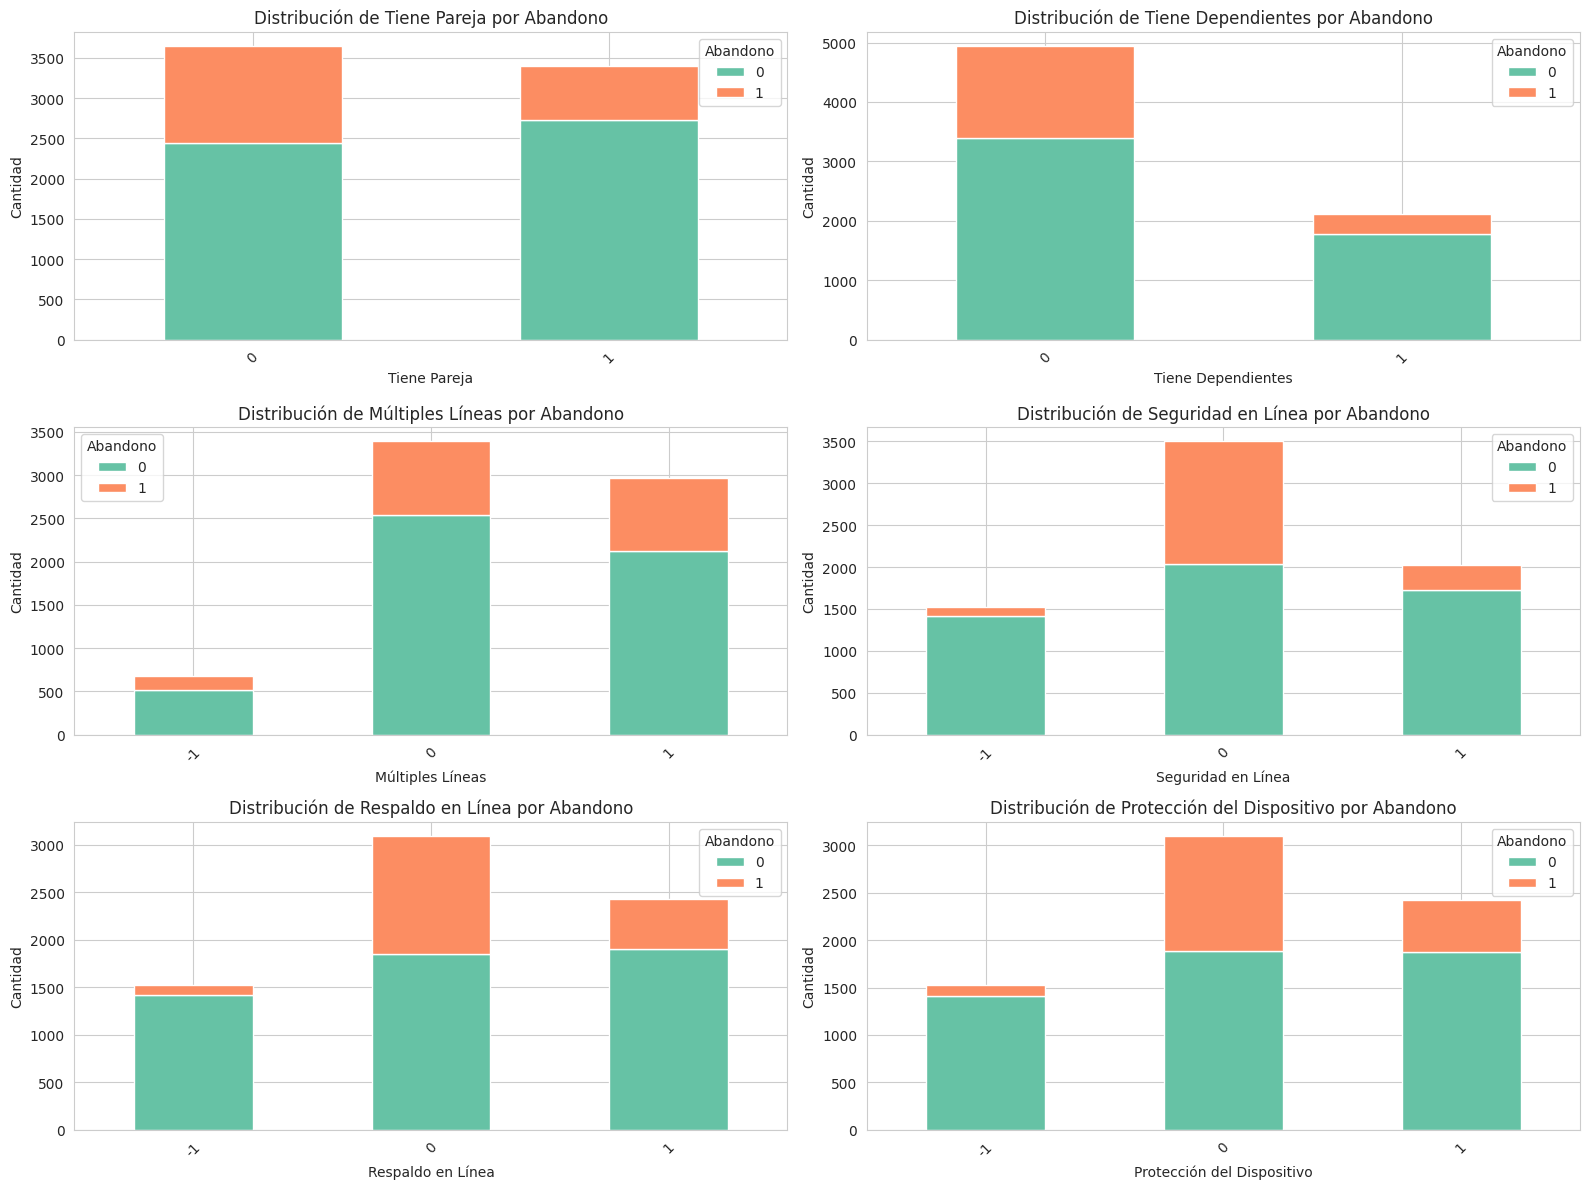

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("colorblind")

plt.figure(figsize=(16,12))
for i, variable in enumerate(variables_binarias, 1):
    plt.subplot(3, 2, i)
    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot.plot(kind='bar', stacked=True,
                   color=sns.color_palette("Set2"),
                   ax=plt.gca())

    plt.title(f'Distribución de {variable} por Abandono')
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Evaluación del p-value:*


In [32]:
# Chi-cuadrado para medir dependencia
from scipy.stats import chi2_contingency

for columna in variables_binarias:
    contingencia = pd.crosstab(data[columna], data['Abandono'])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{columna}: p-valor = {p_valor}")

Tiene Pareja: p-valor = 2.1399113440759935e-36
Tiene Dependientes: p-valor = 4.9249216612154196e-43
Múltiples Líneas: p-valor = 0.0034643829548773
Seguridad en Línea: p-valor = 2.6611496351767036e-185
Respaldo en Línea: p-valor = 2.0797592160864276e-131
Protección del Dispositivo: p-valor = 5.505219496457244e-122



Todas las variables tienen una relación estadísticamente significativa con el abandono.

Hay evidencia de que estas características influyen en la probabilidad de abandon

In [33]:
# Analisis de variables binarias de servicios adicionales
servicios_internet = [
    'Seguridad en Línea',
    'Respaldo en Línea',
    'Protección del Dispositivo',
    'Soporte Técnico',
    'TV por Cable',
    'Streaming de Películas'
]

# Chi-cuadrado para Múltiples Líneas
print("Dependencias con Múltiples Líneas:")
for servicio in servicios_internet:
    contingencia = pd.crosstab(data['Múltiples Líneas'], data[servicio])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{servicio}: p-valor = {p_valor}")

# Chi-cuadrado para Servicios de Internet
print("\nDependencias entre Servicios de Internet:")
for i in range(len(servicios_internet)):
    for j in range(i+1, len(servicios_internet)):
        servicio1 = servicios_internet[i]
        servicio2 = servicios_internet[j]
        contingencia = pd.crosstab(data[servicio1], data[servicio2])
        chi2, p_valor, _, _ = chi2_contingency(contingencia)
        print(f"{servicio1} vs {servicio2}: p-valor = {p_valor}")

Dependencias con Múltiples Líneas:
Seguridad en Línea: p-valor = 2.0627433233527503e-159
Respaldo en Línea: p-valor = 6.073056430297738e-182
Protección del Dispositivo: p-valor = 1.0325188802064614e-183
Soporte Técnico: p-valor = 3.449656924095101e-160
TV por Cable: p-valor = 1.1345217439737563e-207
Streaming de Películas: p-valor = 1.4157232232017275e-208

Dependencias entre Servicios de Internet:
Seguridad en Línea vs Respaldo en Línea: p-valor = 0.0
Seguridad en Línea vs Protección del Dispositivo: p-valor = 0.0
Seguridad en Línea vs Soporte Técnico: p-valor = 0.0
Seguridad en Línea vs TV por Cable: p-valor = 0.0
Seguridad en Línea vs Streaming de Películas: p-valor = 0.0
Respaldo en Línea vs Protección del Dispositivo: p-valor = 0.0
Respaldo en Línea vs Soporte Técnico: p-valor = 0.0
Respaldo en Línea vs TV por Cable: p-valor = 0.0
Respaldo en Línea vs Streaming de Películas: p-valor = 0.0
Protección del Dispositivo vs Soporte Técnico: p-valor = 0.0
Protección del Dispositivo vs TV

Distribución de correlaciones entre los Servicios de Internet:
                            Seguridad en Línea  Respaldo en Línea  \
Seguridad en Línea                    1.000000           0.705166   
Respaldo en Línea                     0.705166           1.000000   
Protección del Dispositivo            0.701690           0.711335   
Soporte Técnico                       0.735191           0.709216   
TV por Cable                          0.662220           0.703167   
Streaming de Películas                0.667033           0.700158   

                            Protección del Dispositivo  Soporte Técnico  \
Seguridad en Línea                            0.701690         0.735191   
Respaldo en Línea                             0.711335         0.709216   
Protección del Dispositivo                    1.000000         0.725327   
Soporte Técnico                               0.725327         1.000000   
TV por Cable                                  0.748182         0.703866   
Str

/tmp/ipython-input-3597445920.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=servicios_count.index, y=servicios_count.values, palette='viridis')


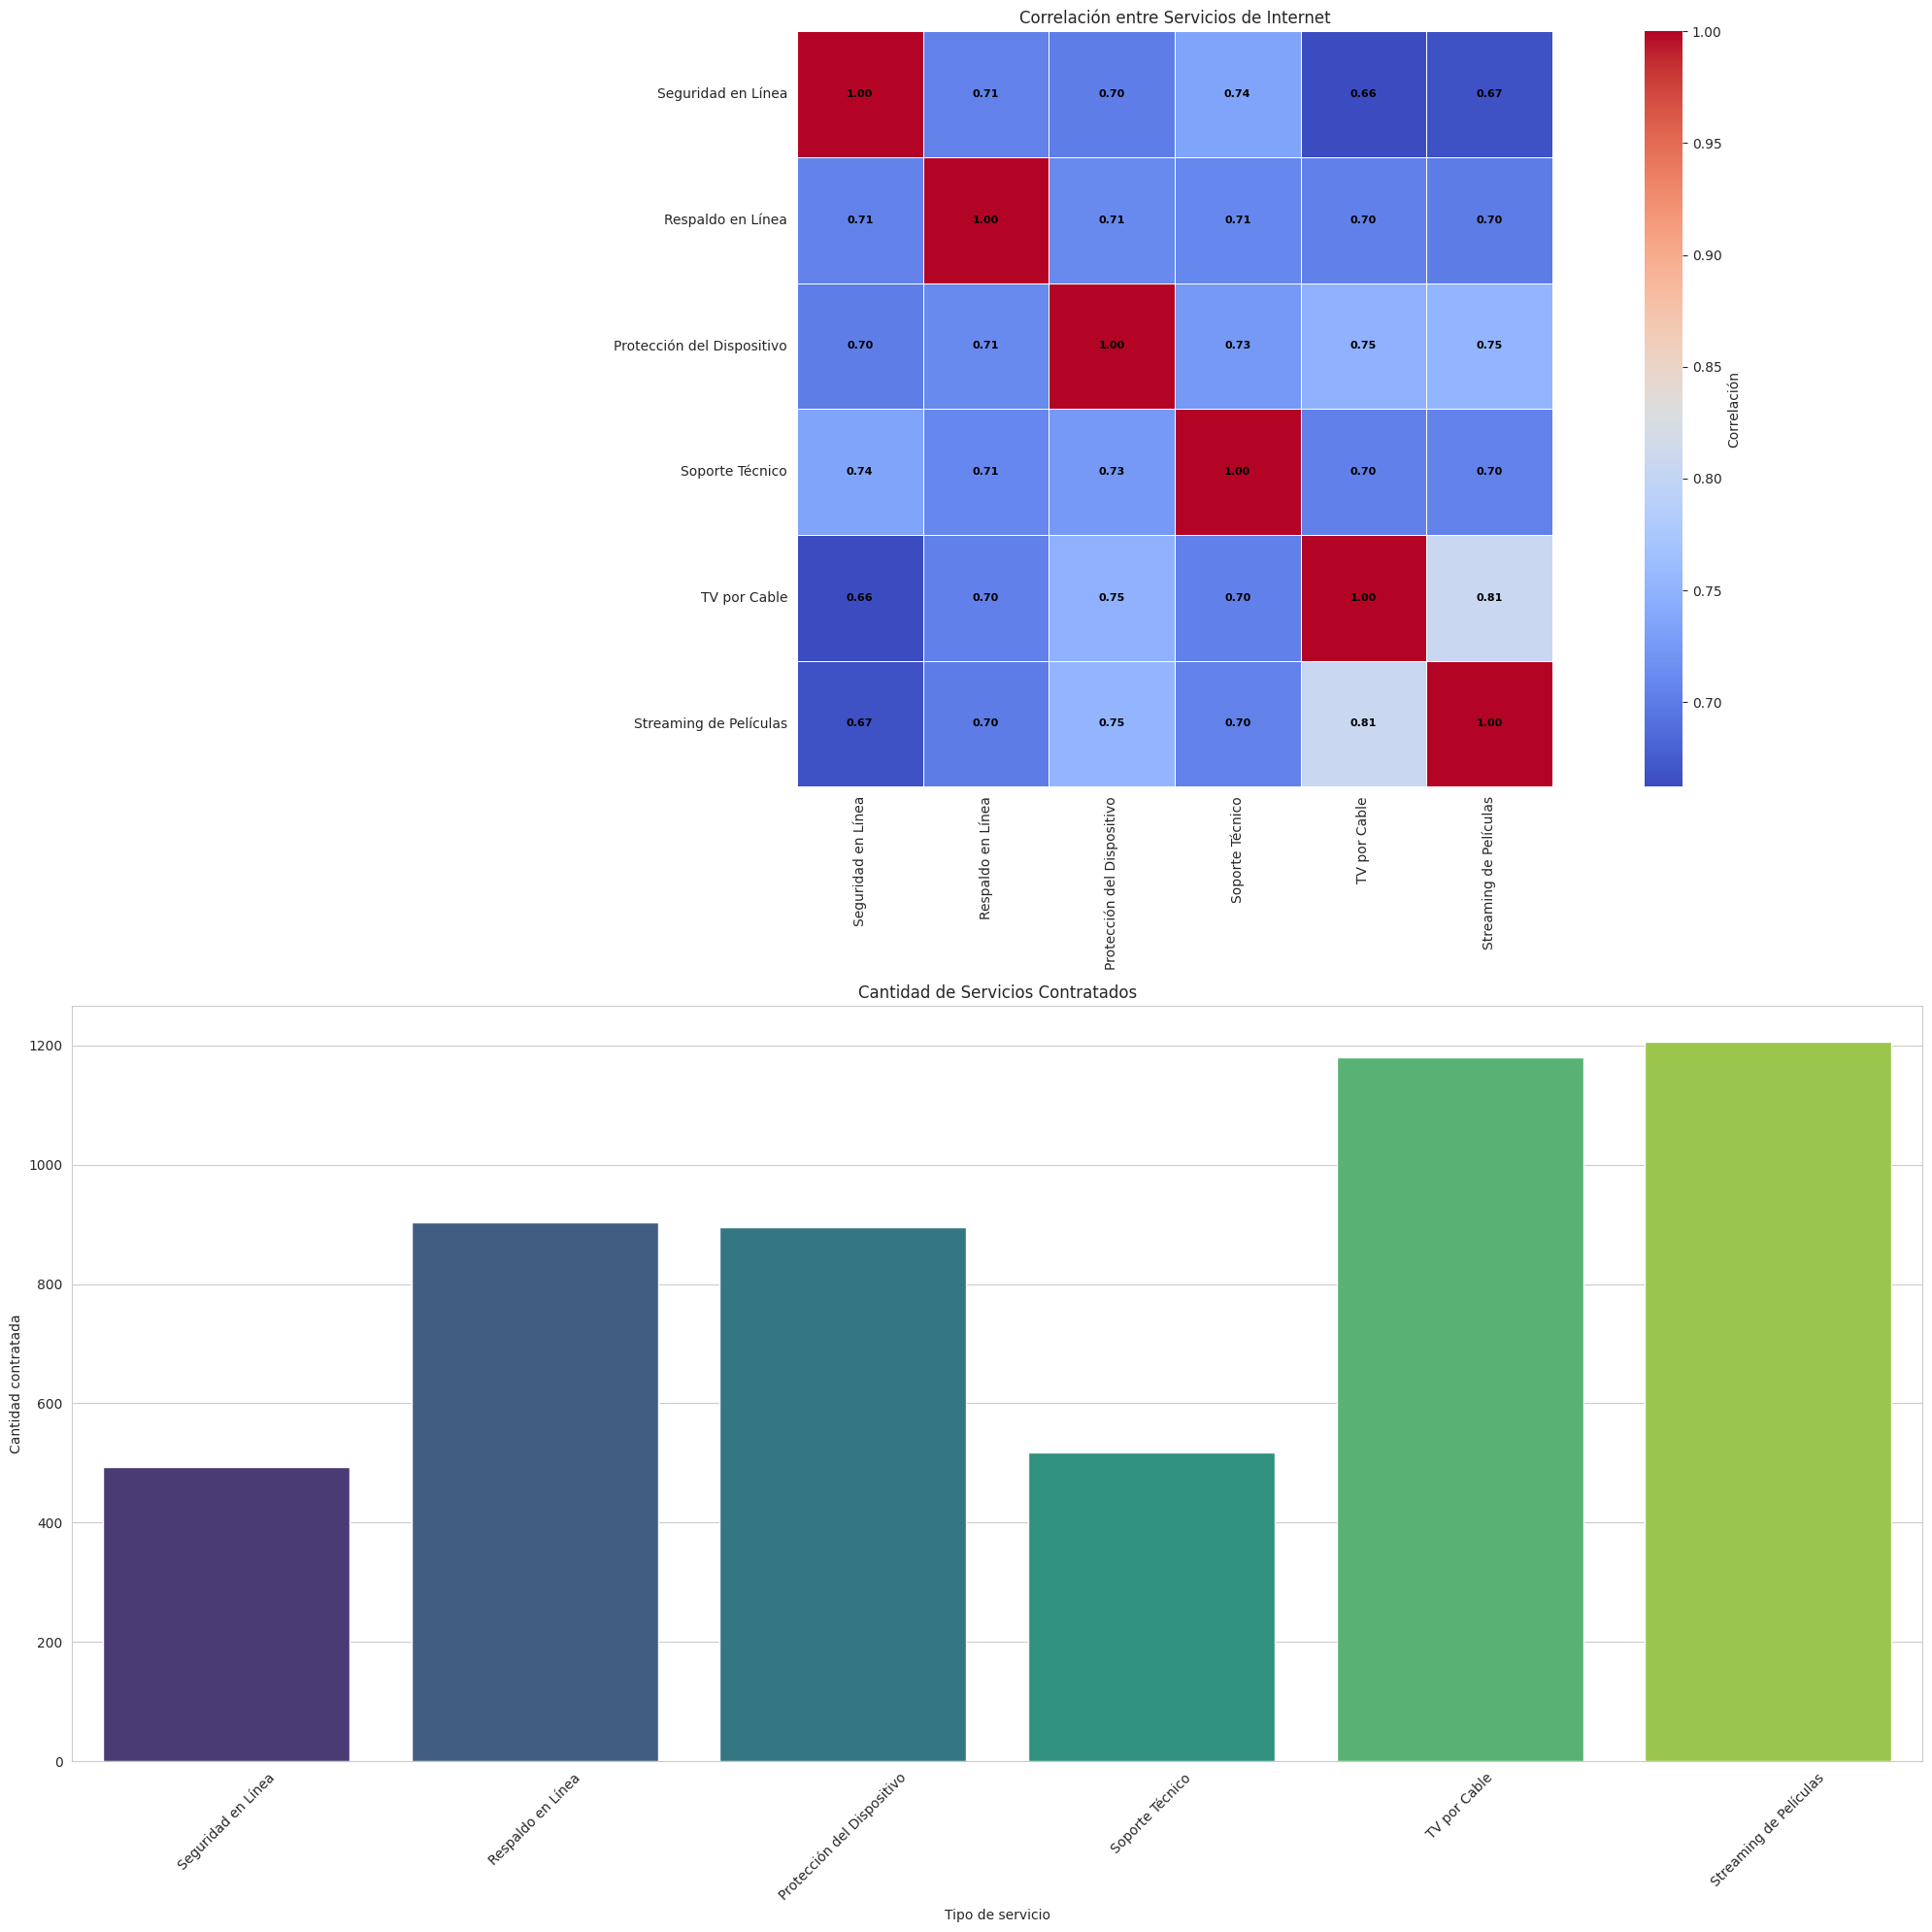

In [50]:
plt.figure(figsize=(20,20))
corr = data[servicios_internet].corr()
print("Distribución de correlaciones entre los Servicios de Internet:")
print(corr)
print('\n')
# Heatmap de correlación
print("Mapa de calor de correlación entre Servicios de Internet:")
plt.subplot(2,1,1)

sns.heatmap(
    data[servicios_internet].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,   # Separación entre celdas
    fmt='.2f',        # Formato de números
    square=True,      # Celdas cuadradas
    cbar_kws={'label': 'Correlación'},
    annot_kws={
        'size': 8,    # Tamaño de fuente
        'weight': 'bold',
        'color': 'black'
    }
)
plt.title('Correlación entre Servicios de Internet')

# Distribución de servicios
plt.subplot(2,1,2)
servicios_count = data[servicios_internet].sum()
sns.barplot(x=servicios_count.index, y=servicios_count.values, palette='viridis')
plt.title('Cantidad de Servicios Contratados')
plt.xticks(rotation=45)
plt.ylabel('Cantidad contratada')
plt.xlabel('Tipo de servicio')

plt.tight_layout()
plt.show()

In [42]:
def analisis_abandono_servicios(servicios):
    resultados = {}
    for servicio in servicios:
        abandono_con_servicio = data[data[servicio] == 1]['Abandono'].mean()
        abandono_sin_servicio = data[data[servicio] == 0]['Abandono'].mean()

        resultados[servicio] = {
            'Abandono con servicio': abandono_con_servicio,
            'Abandono sin servicio': abandono_sin_servicio,
            'Diferencia': abandono_con_servicio - abandono_sin_servicio
        }

    return pd.DataFrame.from_dict(resultados, orient='index')

# Análisis de abandono
print("Análisis de Abandono por Servicios:")
print(analisis_abandono_servicios(servicios_internet))

Análisis de Abandono por Servicios:
                            Abandono con servicio  Abandono sin servicio  \
Seguridad en Línea                       0.146112               0.417667   
Respaldo en Línea                        0.215315               0.399288   
Protección del Dispositivo               0.225021               0.391276   
Soporte Técnico                          0.151663               0.416355   
TV por Cable                             0.300702               0.335231   
Streaming de Películas                   0.299414               0.336804   

                            Diferencia  
Seguridad en Línea           -0.271555  
Respaldo en Línea            -0.183973  
Protección del Dispositivo   -0.166256  
Soporte Técnico              -0.264691  
TV por Cable                 -0.034529  
Streaming de Películas       -0.037390  


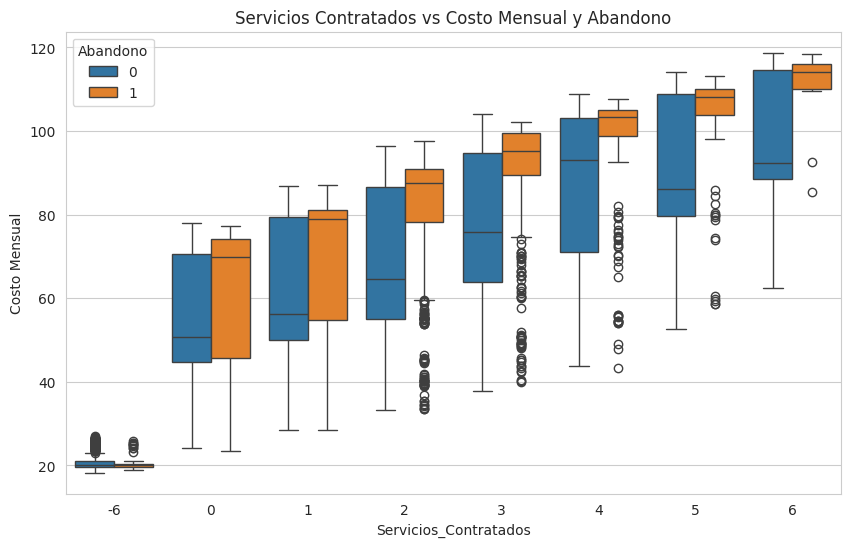

In [44]:
# Número de servicios contratados
data['Servicios_Contratados'] = data[servicios_internet].sum(axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(x='Servicios_Contratados', y='Costo Mensual', hue='Abandono', data=data)
plt.title('Servicios Contratados vs Costo Mensual y Abandono')
plt.show()